In [1]:
import pandas as pd
import numpy as np 
import numpy.matlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so



cardio = pd.read_csv('cardio_train.csv', sep=';')
df=cardio

In [2]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df['age'] = (df['age']//365)
df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


<Axes: xlabel='age', ylabel='count'>

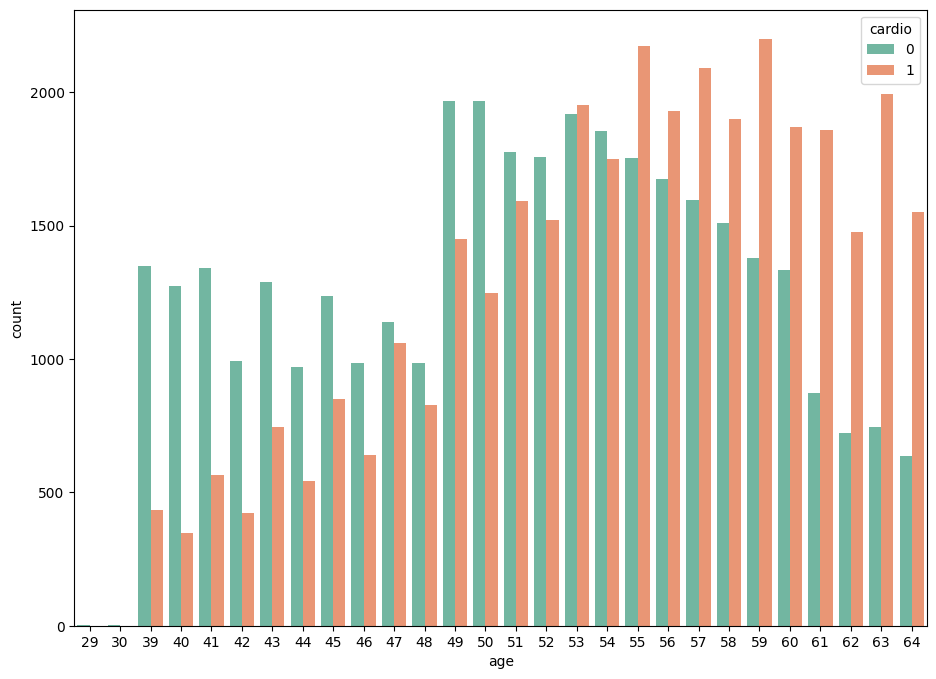

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue='cardio', data = df, palette="Set2")

<Axes: xlabel='variable', ylabel='count'>

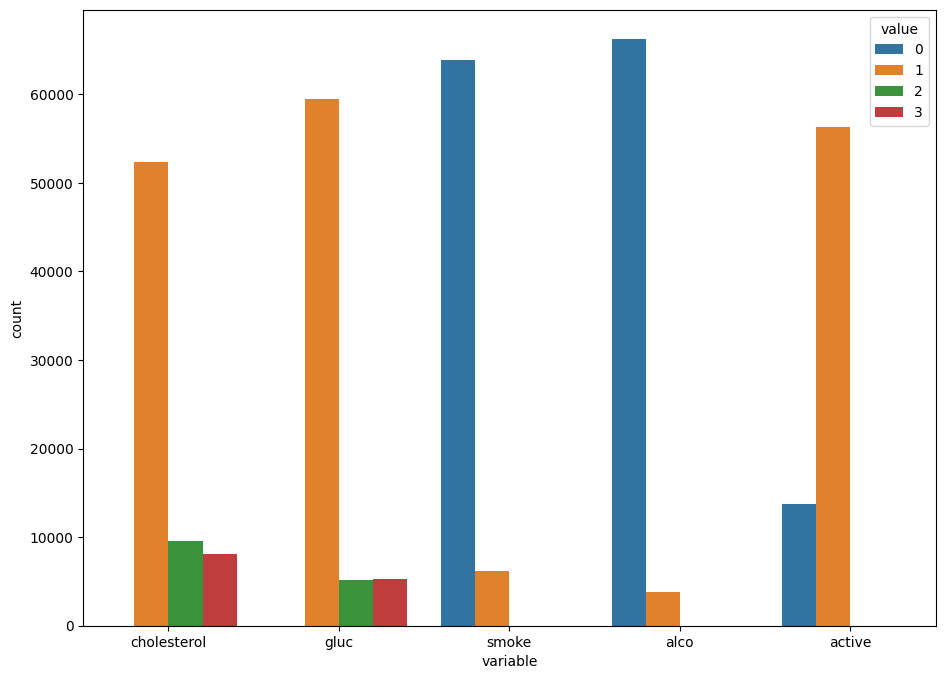

In [5]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical))

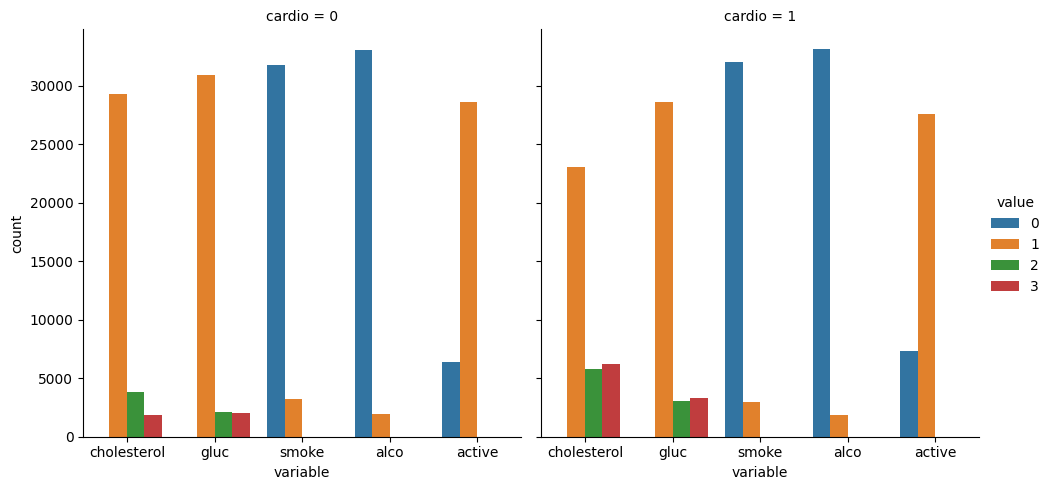

In [6]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count")

결측치 확인/이상치 제거

In [4]:
df.isnull().values.any()


False

In [5]:
df.isnull().sum(axis = 0)


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In [7]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

<Axes: >

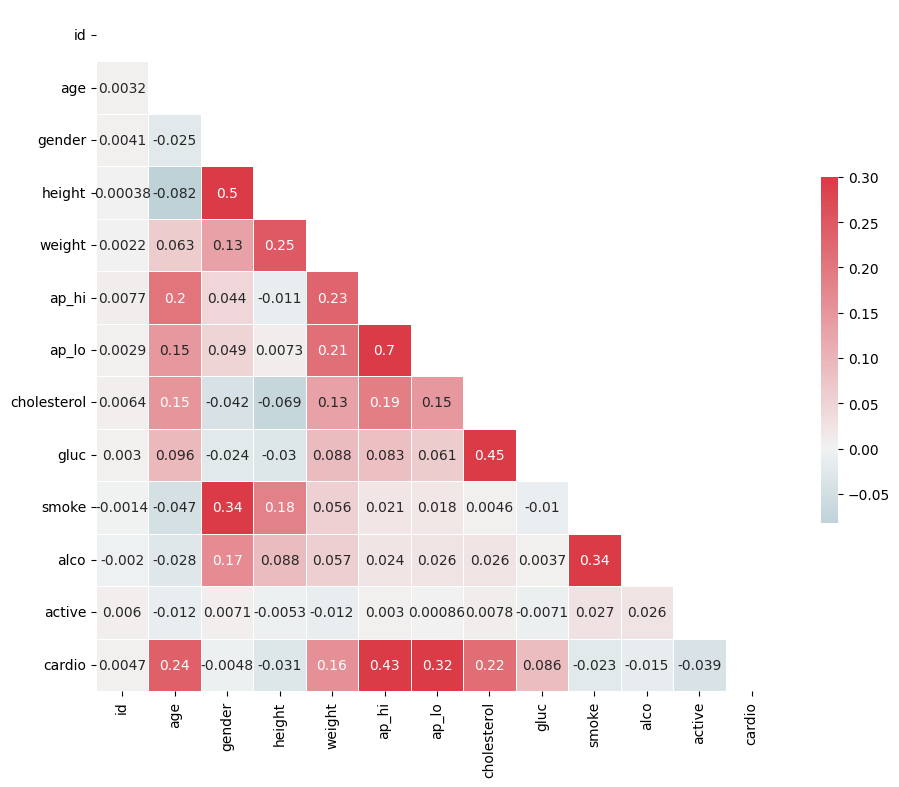

In [11]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,53,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


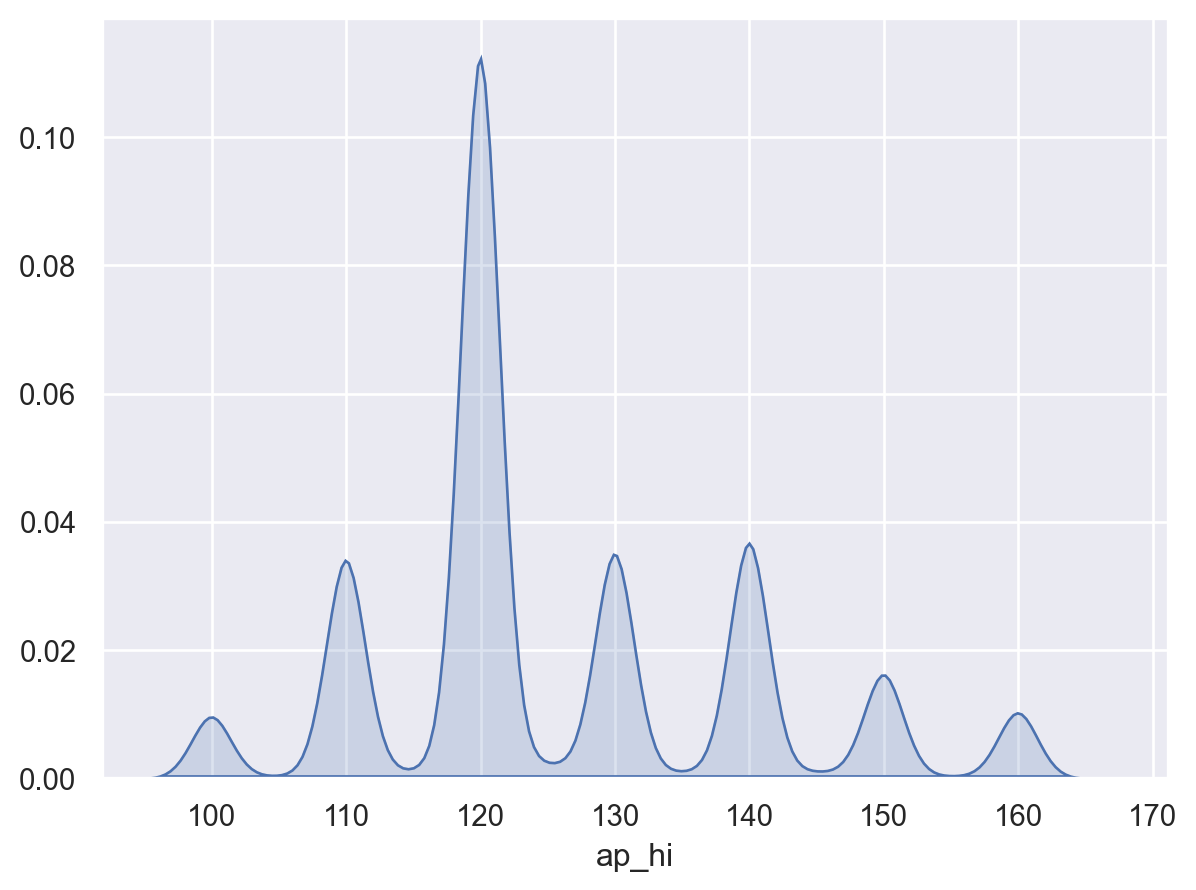

In [13]:
(
    so.Plot(cardio, x="ap_hi")
    .add(so.Area(), so.KDE()) # Density plot
)

In [9]:
df = df.drop('id', axis=1)

df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,1,172,70.0,130,90,1,1,0,0,1,1
69994,57,1,165,80.0,150,80,1,1,0,0,1,1
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


##
머신러닝


In [10]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,1,172,70.0,130,90,1,1,0,0,1,1
69994,57,1,165,80.0,150,80,1,1,0,0,1,1
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [11]:
from sklearn.preprocessing import MinMaxScaler

# 정규화를 적용할 연속형 변수들 선택
continuous_vars = ['age', 'height', 'weight','ap_hi','ap_lo']

# 정규화 객체 생성
scaler = MinMaxScaler()

# 연속형 변수들에 대해 정규화 수행
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])

In [12]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.600000,2,0.600000,0.185185,0.158730,0.50,1,1,0,0,1
1,0.742857,1,0.200000,0.611111,0.634921,0.75,3,1,0,0,1
2,0.628571,1,0.500000,0.222222,0.476190,0.25,3,1,0,0,0
3,0.542857,2,0.633333,0.555556,0.793651,1.00,1,1,0,0,1
4,0.514286,1,0.200000,0.074074,0.000000,0.00,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69993,0.685714,1,0.733333,0.333333,0.476190,0.75,1,1,0,0,1
69994,0.800000,1,0.500000,0.518519,0.793651,0.50,1,1,0,0,1
69995,0.657143,2,0.600000,0.444444,0.317460,0.50,1,1,1,0,1
69998,0.914286,1,0.433333,0.370370,0.555556,0.50,1,2,0,0,0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
print(f'Train : {len(X_train)}개 | Test : {len(X_test)}개')

Train : 48113개 | Test : 12029개


In [19]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.600000,2,0.600000,0.185185,0.158730,0.50,1,1,0,0,1,0
1,0.742857,1,0.200000,0.611111,0.634921,0.75,3,1,0,0,1,1
2,0.628571,1,0.500000,0.222222,0.476190,0.25,3,1,0,0,0,1
3,0.542857,2,0.633333,0.555556,0.793651,1.00,1,1,0,0,1,1
4,0.514286,1,0.200000,0.074074,0.000000,0.00,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,0.685714,1,0.733333,0.333333,0.476190,0.75,1,1,0,0,1,1
69994,0.800000,1,0.500000,0.518519,0.793651,0.50,1,1,0,0,1,1
69995,0.657143,2,0.600000,0.444444,0.317460,0.50,1,1,1,0,1,0
69998,0.914286,1,0.433333,0.370370,0.555556,0.50,1,2,0,0,0,1


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 연속형 변수들과 이진 변수들로 분할
continuous_vars = ['age', 'height', 'weight','ap_hi','ap_lo']
binary_vars = ['gender', 'smoke','cholesterol','gluc','alco','active']

# 연속형 변수들에 대한 정규화
scaler = StandardScaler()
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])

# PCA 객체 생성 및 적용
pca = PCA()
df_pca = pca.fit_transform(df[continuous_vars])

# PCA 결과 확인
explained_variance_ratio = pca.explained_variance_ratio_


In [15]:
explained_variance_ratio

array([0.37847267, 0.24252789, 0.180628  , 0.13813398, 0.06023745])

linear svm을 사용하여 

In [22]:
X_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
33108,1.000000,1,0.333333,0.203704,0.793651,0.25,1,1,0,0,1
58419,0.971429,1,0.900000,0.537037,0.634921,0.50,3,3,0,0,1
40370,1.000000,2,0.400000,0.185185,0.317460,0.50,1,1,0,0,1
61622,0.685714,1,0.133333,0.037037,0.317460,0.50,1,1,0,0,1
53512,0.571429,2,0.600000,0.592593,0.476190,0.75,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
38677,0.314286,1,0.200000,0.388889,0.158730,0.25,1,1,0,0,0
52112,1.000000,1,0.066667,0.259259,0.317460,0.50,1,1,0,0,1
55819,0.600000,1,0.266667,0.500000,0.317460,0.50,1,1,0,0,1
5252,0.685714,1,0.300000,0.277778,0.317460,0.50,1,1,0,0,1


linear svm

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model1 = SVC(kernel='poly')
model1.fit(X_train, y_train)

SVC(kernel='poly')

kernel rbf svm

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model2 = SVC(kernel='rbf')
model2.fit(X_train, y_train)

SVC()

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model3 = SVC(kernel='linear')
model3.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# SVC 모델 정의
model = SVC(kernel='rbf')

# 탐색할 파라미터 그리드 생성
param_grid = {
    'C': [0.1, 1, 10,100],
    'gamma': [0.001, 0.01, 0.1]
}

# 그리드 서치를 사용하여 최적 파라미터 탐색
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 해당 파라미터 조합에서의 정확도 출력
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [26]:
X_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
33108,1.000000,1,0.333333,0.203704,0.793651,0.25,1,1,0,0,1
58419,0.971429,1,0.900000,0.537037,0.634921,0.50,3,3,0,0,1
40370,1.000000,2,0.400000,0.185185,0.317460,0.50,1,1,0,0,1
61622,0.685714,1,0.133333,0.037037,0.317460,0.50,1,1,0,0,1
53512,0.571429,2,0.600000,0.592593,0.476190,0.75,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
38677,0.314286,1,0.200000,0.388889,0.158730,0.25,1,1,0,0,0
52112,1.000000,1,0.066667,0.259259,0.317460,0.50,1,1,0,0,1
55819,0.600000,1,0.266667,0.500000,0.317460,0.50,1,1,0,0,1
5252,0.685714,1,0.300000,0.277778,0.317460,0.50,1,1,0,0,1


In [27]:
pred_train = model1.predict(X_train)
pred_test = model1.predict(X_test)
print('Poly kernel SVM')
print(f'Training accuracy : {accuracy_score(y_train, pred_train):.4f} | Test accuracy : {accuracy_score(y_test, pred_test):.4f}')

Poly kernel SVM
Training accuracy : 0.7196 | Test accuracy : 0.7219


In [28]:
pred_train = model2.predict(X_train)
pred_test = model2.predict(X_test)
print('RBF kernel SVM')
print(f'Training accuracy : {accuracy_score(y_train, pred_train):.4f} | Test accuracy : {accuracy_score(y_test, pred_test):.4f}')

RBF kernel SVM
Training accuracy : 0.7226 | Test accuracy : 0.7242


In [29]:
pred_train = model3.predict(X_train)
pred_test = model3.predict(X_test)
print('linear kernel SVM')
print(f'Training accuracy : {accuracy_score(y_train, pred_train):.4f} | Test accuracy : {accuracy_score(y_test, pred_test):.4f}')

linear kernel SVM
Training accuracy : 0.7175 | Test accuracy : 0.7226


DT

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics

Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
Y_pred = Decision_Tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

Accuracy: 0.6264859921855516


In [21]:
from sklearn.ensemble import AdaBoostClassifier


In [22]:
# DecisionTree를 활용한 Adaboost
tree_model = DecisionTreeClassifier(max_depth=5)
clf = AdaBoostClassifier(estimator = tree_model, n_estimators=10, random_state=0)
clf.fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7255798486989775


Accuracy: 0.7255798486989775
Confusion Matrix:
[[4844 1293]
 [2008 3884]]


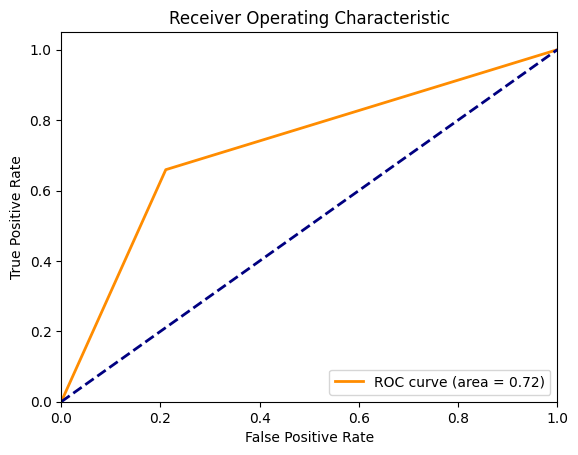

In [23]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Adaboost 모델 정의 및 훈련
tree_model = DecisionTreeClassifier(max_depth=5)
clf = AdaBoostClassifier(estimator=tree_model, n_estimators=10, random_state=0)
clf.fit(X_train, y_train)

# 예측 수행
y_pred = clf.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 혼동 행렬 출력
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC 곡선 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier


In [35]:
lr_clf=LogisticRegression(max_iter=10000)
nb_clf=GaussianNB()
# knn_clf=KNeighborsClassifier(n_neighbors=8)
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('NB',nb_clf)],voting='soft')
vo_clf.fit(X_train,y_train)
Y_pred=vo_clf.predict(X_test)
print('Voting Classifier Accuracy : {0:.4f}'.format(accuracy_score(y_test,Y_pred)))

Voting Classifier Accuracy : 0.7191


앙상블 진행, poly kernel의 svm, LogisticRegression,

In [36]:
svm = SVC(kernel='poly', C = 3,degree=3, probability=True)
lr_clf=LogisticRegression(max_iter=1000)
nb_clf=GaussianNB()
Decision_Tree = DecisionTreeClassifier()
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('NB',nb_clf),('DT',Decision_Tree),('svm',svm)],voting='soft')

vo_clf.fit(X_train,y_train)
y_pred=vo_clf.predict(X_test)
print('Voting Classifier Accuracy : {0:.4f}'.format(accuracy_score(y_test,y_pred)))

Voting Classifier Accuracy : 0.7139


In [60]:
from sklearn.tree import DecisionTreeClassifier

# 의사 결정 트리 모델 훈련
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 특성 중요도 확인
importance = model.feature_importances_
importance

array([0.15521106, 0.03251917, 0.20838664, 0.2238988 , 0.22464464,
       0.05142512, 0.04167919, 0.02473517, 0.0120553 , 0.00921258,
       0.01623232])

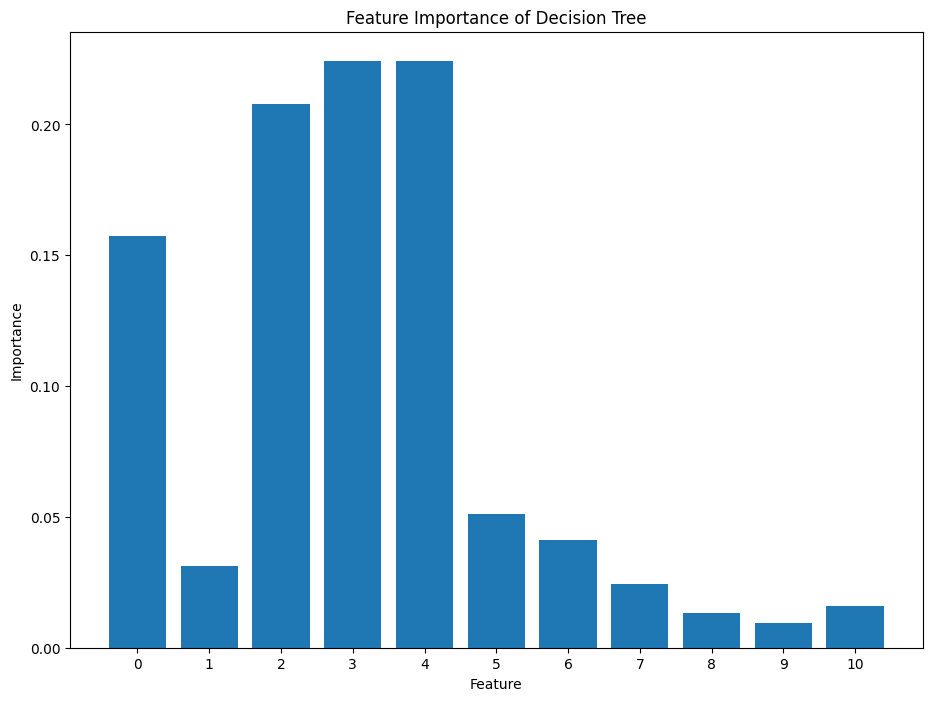

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# 의사 결정 트리 모델 훈련
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 특성 중요도 확인
importance = model.feature_importances_

# 특성 중요도 시각화
feature_names = np.arange(len(importance))
plt.bar(feature_names, importance, tick_label=feature_names)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance of Decision Tree")
plt.show()


In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# SVC 모델 정의
model = SVC(kernel='rbf')

# 탐색할 파라미터 그리드 생성
param_grid = {
    'C': [0.1, 1, 10,100],
    'gamma': [0.001, 0.01, 0.1]
}

# 그리드 서치를 사용하여 최적 파라미터 탐색
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 해당 파라미터 조합에서의 정확도 출력
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'C': 100, 'gamma': 0.1}
Best Score: 0.7238999687512508


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest 모델 정의
model = RandomForestClassifier()

# 탐색할 파라미터 그리드 생성
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# 그리드 서치를 사용하여 최적 파라미터 탐색
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 해당 파라미터 조합에서의 정확도 출력
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.7277034687882841


In [68]:
count_1 = df['cardio'].value_counts()
count_1


0    30779
1    29363
Name: cardio, dtype: int64

In [67]:
def result(X_train, X_test, y_train, y_test):
    m1=SVC(kernel="rbf",C=100, gamma=0.01)
    m1.fit(X_train,y_train)
    y_pred = m1.predict(X_test)
    result1=accuracy_score(y_test,y_pred)
    return result1

In [62]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.420858,2,0.504405,-0.983822,-1.145970,-0.126993,1,1,0,0,1,0
1,0.320099,1,-1.252519,0.996426,1.033989,1.086733,3,1,0,0,1,1
2,-0.272666,1,0.065174,-0.811626,0.307336,-1.340720,3,1,0,0,0,1
3,-0.717240,2,0.650816,0.738133,1.760641,2.300460,1,1,0,0,1,1
4,-0.865432,1,-1.252519,-1.500408,-1.872622,-2.554446,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,0.023716,1,1.090047,-0.295040,0.307336,1.086733,1,1,0,0,1,1
69994,0.616482,1,0.065174,0.565937,1.760641,-0.126993,1,1,0,0,1,1
69995,-0.124475,2,0.504405,0.221546,-0.419317,-0.126993,1,1,1,0,1,0
69998,1.209247,1,-0.227647,-0.122845,0.670662,-0.126993,1,2,0,0,0,1


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler


lgbm = LGBMClassifier(class_weight='balanced')
lgbm.fit(reX_train,rey_train)
pred_train = lgbm.predict(reX_train)
pred_test = lgbm.predict(X_test)

print("Classificcation Report: \n{}".format(classification_report(y_test, pred_test)))

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,
                     is_unbalance = True,boost_from_average=False)
modeling(lgb,X_train,X_test,y_train,y_test)

연속 변수가 4개이고 범주형 데이터가 7개인 상황에서 SVM(Support Vector Machine)을 사용하여 이진 분류 모델을 만드는 것은 가능합니다. SVM은 특히 데이터가 고차원이고 비선형 결정 경계를 가질 수 있는 경우에 유용한 알고리즘입니다.

SVM은 주어진 데이터를 고차원 공간으로 매핑한 후, 서포트 벡터라고 불리는 데이터 포인트들을 기준으로 클래스를 구분하는 최적의 초평면을 찾습니다. 이를 통해 데이터를 잘 분류할 수 있는 결정 경계를 찾을 수 있습니다. SVM은 특히 데이터셋이 작고 차원이 높은 경우에도 잘 작동하는 특징이 있습니다.

따라서, 연속 변수와 범주형 변수가 혼합된 데이터셋에서 SVM을 사용하여 이진 분류 문제를 예측하는 모델을 만들 수 있습니다. 그러나 SVM은 연속 변수들에 대해 스케일링을 적용하는 것이 중요합니다. 따라서, 데이터의 스케일을 조정하는 작업인 데이터 정규화(또는 표준화)를 수행하는 것이 좋습니다.

또한, SVM은 하이퍼파라미터인 C와 gamma를 조정하여 모델의 성능을 향상시킬 수 있습니다. C는 오분류에 대한 페널티를 조절하는 매개변수이고, gamma는 결정 경계의 유연성을 제어하는 매개변수입니다. 이러한 하이퍼파라미터 튜닝은 모델의 성능을 최적화하는 데 도움이 됩니다.

따라서, 데이터를 적절하게 스케일링하고 SVM의 하이퍼파라미터를 조정하여 이진 분류 문제를 예측하는 모델을 만들 수 있습니다. 그러나 최적의 알고리즘 선택은 데이터셋의 특성과 목표에 따라 다를 수 있으므로, 다른 알고리즘과 비교하여 성능을 평가하는 것이 좋습니다.

PCA(Principal Component Analysis)는 연속형 변수들의 차원 축소에 주로 사용되는 기법입니다. 연속형 변수들의 차원이 상대적으로 높은 경우에 PCA를 사용하여 변수들 간의 상관관계를 고려하여 데이터를 새로운 축으로 변환하고 차원을 축소할 수 있습니다. 이를 통해 데이터의 중요한 특징을 보존하면서 변수의 수를 줄일 수 있습니다.

하지만 범주형 데이터는 기본적으로 범주 간의 관계를 나타내기 때문에 PCA를 직접적으로 적용하기는 어렵습니다. 범주형 데이터를 사용하는 경우, 일반적으로 원핫인코딩 또는 더미 변수화와 같은 방법을 사용하여 범주형 변수를 이진 변수로 변환한 후 PCA를 적용할 수 있습니다.

따라서, 연속형 변수가 4개이고 범주형 데이터가 7개인 경우, PCA를 적용하기 전에 범주형 변수를 이진 변수로 변환해야 합니다. 그 후, 연속형 변수와 변환된 이진 변수를 함께 PCA에 적용하여 차원을 축소할 수 있습니다.

PCA의 적용은 데이터의 특성과 목적에 따라 다를 수 있습니다. 연속형 변수의 차원이 크게 줄어들지 않거나, 범주형 변수의 정보를 보존해야 할 경우에는 PCA를 적용할 필요가 없을 수도 있습니다. 따라서, 데이터의 특성과 분석 목적에 맞게 PCA의 적용 여부를 결정해야 합니다.